# <center>Financial products and Greeks discussed during the course</center>
<center>[Risk-neutral pricing](#risk-neutral) $\cdot$ [Large price changes](#large-changes) $\cdot$ [Call option](#call-option) $\cdot$ [Derivatives](#derivatives) $\cdot$ [Greeks](#greeks)<br/><br/>
[Your home loan $\rightarrow$ What is a fixed leg and what is a floating leg ?](#home-loan)<br/><br/>
[Time value of money, Discount factor](#time-value-of-money) $\cdot$ [Yield curve, LIBOR, Futures, Forward, Interest Rate Swap](#yield-curve). See above: Derivatives, Hedging.</center>

## <span style="background:#b2ffff">Risk-neutral pricing</span> <a class="anchor" id="risk-neutral"></a>

<ul>
<li>Arbitrage: different paths between the same two end points can give different profits.
<br/>
<i>Example:</i> (1) buy X now and sell 1 week from now, vs (2) buy X tomorrow and sell 1 week from now.
<br/><br/>
<li>In an ideal world: there is no arbitrage and all information is immediately available to everyone.
<br/><br/>
<li>In real life: if you work with lower risk, then you ask for a lower price.
<br/>
<i>Example:</i> With good credit history your can get a home loan with better terms.
</ul>


## <span style="background:#b2ffff">Large price changes</span> <a class="anchor" id="large-changes"></a>

Imagine that one year from now you will need to buy $10.000$ barrels of oil, and you can buy it from two companies: A and B.<br/>
Currently, the two prices are equal: $S_A(t=0)=S_B(t=0)=\$50$ per barrel, but they change over time.

1. If the code window below is open, then close it with the little triangle at its top left.

2. Click on the plot. Keep CTRL pressed down. Press down ENTER approximately 20 times. Each time check the "one year later" prices.

3. Observe that sometimes Price B has very big unexpected jumps compared to Price A.

4. Open the code, and turn on line numbering by pressing CTRL-M L.

5. In line 10 of the code change the variable <tt>number_of_instances</tt> from 1 to 20.

6. Close the code. Click on the plot. Press CTRL-ENTER once.

7. Compare the curves (possible paths) plotted for the two prices.

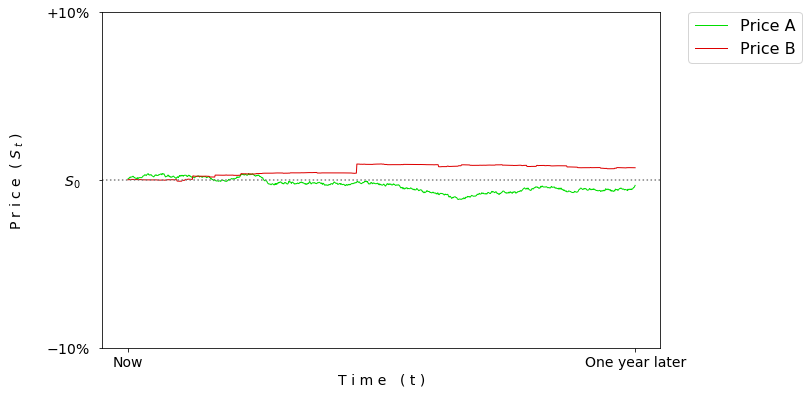

In [6]:
# === Compare two prices over time. ===

# === Importing libraries. Setting plot dimensions. ===
import numpy as np
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 6.18)) # resizing the figure

# === Parameters for plotting ===
number_of_instances = 1 # plot this number of instances for both prices
pow = 3 # the random walk is plotted with 10^pow steps on the [0,1] interval
number_of_time_points = int(np.power(10.0,pow)) # number of time points
rescaled_time_points = np.linspace(0, 1, number_of_time_points) # the list of n time points between 0 and 1
my_fontsize = 16 # font size for the plot
my_linewidth = 1 # setting plot line width

# === Constructing a rescaled Wiener process with n steps (n points) from a std. normal distribution ===
def price_A(n):
    random_steps_A = np.random.standard_normal(n) # n random steps, each selected from the given distribution
    cumulated_random_steps_A = np.cumsum(random_steps_A) # cumulated sum of the random steps
    rescaled_cumulated_random_steps_A = [ x / np.sqrt(n) for x in cumulated_random_steps_A ] # rescaling the cumulated steps
    return rescaled_cumulated_random_steps_A
    
# === Constructing a rescaled process with n steps from a different distribution  ===
def price_B(n):
    random_steps_B = np.random.standard_cauchy(n) # n random steps taken from another distribution
    cumulated_random_steps_B = np.cumsum(random_steps_B)
    rescaled_cumulated_random_steps_B = [ x / n for x in cumulated_random_steps_B ]
    return rescaled_cumulated_random_steps_B

# === Plotting ===
for index_of_instance in np.arange(number_of_instances):
    plt.plot(rescaled_time_points, price_A(number_of_time_points), c='#00dd00', label="Price A", lw=my_linewidth)
    plt.plot(rescaled_time_points, price_B(number_of_time_points), c='#dd0000', label="Price B", lw=my_linewidth)
    if ( 0 == index_of_instance ): # with the first instance of both curves, plot the legend
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position, font size

# === Plot properties ===
my_fontsize = 14 # font size for the text of the current plot
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.ylabel('P r i c e  ( $S_{\ t}$ )\n', fontsize=my_fontsize) # x axis label
plt.xlabel('T i m e   ( t )', fontsize=my_fontsize) # x axis label

# === Plot ticks ===
ax = plt.gca() # gca: get current axes, access the properties of the plot
ax.set_xticks([0, 1])
ax.set_xticklabels(['Now','One year later'], fontsize=my_fontsize)
ax.set_yticks([-10,0,10])
ax.set_yticklabels(["$-10\%$  "," $S_0$    ","$+10\%$  "], fontsize=my_fontsize)
plt.tick_params(labelsize=my_fontsize) # tick label size
plt.show() # display the entire plot


## <span style="background:#b2ffff">Call option</span> <a class="anchor" id="call-option"></a>

### Option
You can buy an option to protect yourself against an unexpectedly high or low future price.

### Call or Put
If you need protection against a high price in the future, you buy a call option on the price. <br>
The buyer of the put option has protection against low prices.

## How does a call option protect against high prices ? 

Consider the following situation:

- Your company pays for a raw material (for example, oil) at the beginning of each year.
- If one year from now the price of oil is above $K=\$80$, then your company loses its profits.
<br/>
In other words, $K$ is the highest price you can afford to pay for buying oil at $T=$ one year from now.

What can you do ?

1. Buy now a call option to ensure that at time $T$ you pay <b>at most</b> the fixed price $K$. 

2. If at $T$ the price of oil, $S_T$, is below $K$, then your call option pays nothing and you will pay $S_T$ for the oil.

3. If $S_T>K$, then your call option pays $S_T-K$, so you will pay only $K$.

4. Run the code below to see your balance at different $S_T$ values.

5. Observe that the call option with maturity $T$ and strike $K$ is a financial product, you can buy it for $P$ amount of money.

6. Note also that this product is called a European call option.

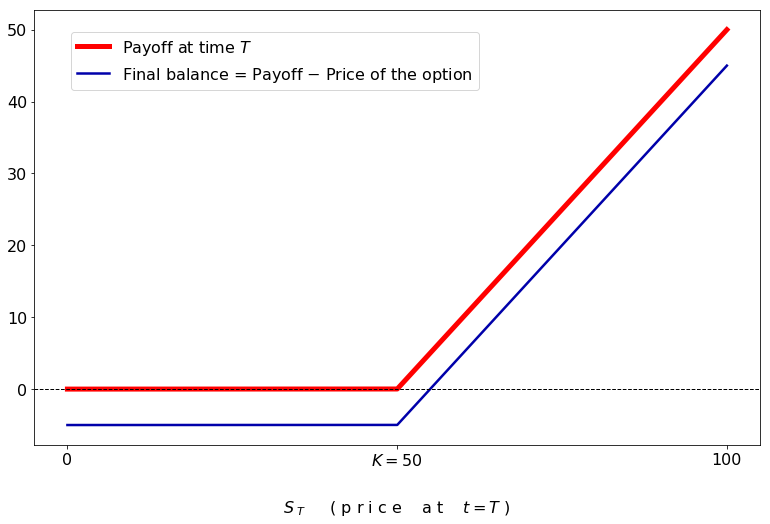

In [47]:
# === Call option payoff ===

# === Importing libraries and Setting values ===
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams # detailed parameter setting
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 16
w = 5 # line width

# === Definitions ===
strike = 50 # strike price of the call option
call_price = 5 # This is only a dummy value for the price of the call option. We will calculate this price.
range_min = 0 # starting point of the range where payoff values are plotted
range_max = 2*strike # end point of the plotting range
step = 0.001 # step size of for plotting
x_axis = np.arange(range_min, range_max, step) # the list of underlying stock price values for which the payoff are computed
payoff_values = [ 0.0 if x < strike else x - strike for x in x_axis ]
total_balance = [ x - call_price for x in payoff_values ] # balance after including the price of the payoff

# === Plotting ===
plt.plot(x_axis, payoff_values, color='red', lw=w, label='Payoff at time $T$') # plot payoff values
plt.plot(x_axis, total_balance, color='#0000aa', lw=w/2, label='Final balance = Payoff $-$ Price of the option') # balance
plt.legend(bbox_to_anchor=(.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
plt.xlabel('$S_{\ T}$     ( p r i c e    a t    $t = T$ ) ', labelpad=30, fontsize=my_fontsize) # set the x label of the plot
rcParams['axes.titlepad'] = 20 # moving the title a little further away from the plot
plt.tick_params(labelsize=my_fontsize) # tick parameter font size
ax = plt.gca() # gca: get current axes
plt.tick_params(labelsize=my_fontsize) # tick text font size
ax.axhline(linestyle='--',color='black',linewidth=1)
ax.set_xticks([range_min, strike, range_max])
ax.set_xticklabels([range_min,"$K=$"+str(strike),range_max])

# === Display the entire plot ===
plt.show() # display the entire plot

## <span style="background:#b2ffff">Derivative products</span> <a class="anchor" id="derivatives"></a>

The call option has a price. Before its maturity (time $T$) you can buy it and sell it.<br/>$\Rightarrow$ It is a financial product.


A <b>financial product</b> is defined by the mathematical rules telling <br/>
how much and when you <b>pay</b> and <b>receive</b>. Both can be more than once.


Derivatives products are a type of financial product.

In the above example, oil price is called the <b>underlying</b> and the call option is called a (financial) <b>derivative</b> on this underlying.

### Examples

| Underlying | Derivative<br/>product | Purpose | Parameters of the<br/>derivative product | Notional (Unit) |
|:---|:---|:---|:---|:---|
| EUR / USD exchange rate | You buy a call option on the<br/>EUR / USD exchange rate | Counterparty pays (you receive)<br/>when EUR / USD is high | $T$ (maturity), $K$ (strike), $\dots$ | &nbsp; |
| Apple stock (AAPL) | You buy a call on AAPL | Cpty pays when AAPL is high | &nbsp; |
| &nbsp; | You sell a call on AAPL | You pay (Pty pays) when AAPL is high | &nbsp; |
| HDD (Heating Degree Day): How many F degrees<br/>today's average temperature is below 56F (18C) | You buy call on HDD | You receive payment (Cpty pays) when<br/>HDD is high, i.e., when temperature is low | &nbsp; | &nbsp; |

### What is the unit (notional) of an option ?

It is often for 1 or 1M of a unit of the underlying. Try to fill in the above table.

## <span style="background:#b2ffff">Greeks</span> <a class="anchor" id="greeks"></a>

In finance, the "Greeks" are a list of (mainly) Greek letters: $\Delta$, $\Gamma$, $\Theta$, $\nu$, $\dots$
 
The price of a derivative product depends on many variables.
<br/>For example, if the price of the underlying over time is $\ S\ (\ t\ )\ $, then the price of the call option is  $\ \ f = f\ \big(\ S(t),\ T,\ K,\ \dots\ \big)$.

### Delta $\ \ \ \Delta$

If the price of the underlying changes by a very small unit, and nothing else changes, then the price of the derivative product changes by $\Delta$ times this very small unit. The same sentence in mathematical form: $$ \Delta = \frac{\partial\ f}{\partial\ S}$$

#### $\Rightarrow$ <span style="background:#ffb2b2">Real-life Question</span>

Trader Joe holds 1 unit of a derivative product and some amount of the underlying. One day the value of the underlying changes a little. The <b>total value</b> of the derivative and underlying <b>does not change</b>. How much of the underlying does the Trader have? Hint: <b>explain your answer</b> and use a Greek letter.

Note: Often, it is a Trader's goal to keep total value constant. $\Delta$ is only the first-order approximation.

### Theta $\ \ \ \Theta$

The price of the call option changes over time. For example:
* If you start with $S(t=0)$ a little below $K$, then it is still possible that $S(t=T)>K$, thus, the call option has positive payoff.
* If the price of the underlying stays constant below $K$, then the chance for $S(t=T)>K$ gets smaller.

If time changes by a small unit and nothing else changes, then the price of the derivative product changes by $\ -\ \Theta\ $ times this small unit of time. The same sentence in mathematical form: $$ \Theta = -\ \frac{\partial\ f}{\partial\ t}$$

### <span style="background:#ffff00">Summary</span>

In finance "derivative" means derivative product. In mathematics it means differentiation from calculus.

The Greeks are the (mathematical) partial derivatives<br/>
of the price (a function) of the derivative product with respect to its variables: price of the underlying, time, etc.

Keeping $\ -\Delta\ $ amount of underlying on your portfolio protects you against small changes of the price of the underlying asset.

Time change protection is with $\ -\Theta\ $ amount.

## <span style="background:#b2ffff">How much do you pay for your home loan ?</span> <a class="anchor" id="home-loan"></a>

After you receive $\ N\ $ (money) as your home loan from the bank,<br/>
your monthly fixed payment is $\ m\ $ for the next $\ k\ $ months.<br/>
How is $\ m\ $ calculated ? How much is one of your future payments of $\ m\ $ worth now ?

#### $\Rightarrow$ <span style="background:#ffb2b2">Real-life Questions</span>

(1)

* With yearly inflation rate $\ r>0\ $ how much would you pay $\ T\ $ years from now for something worth $\ m\ $ now ?

* You would pay something around $\ F = \ m\ \big( 1 + r\ \big)^{\ T}$. In finance, the risk-free rate is used for $\ r\ $.

* Note: inflation and risk-free rate are different. Risk-free rate: how much the central bank requests for lending money.

* In other words, a monthly payment of $\ m\ $ that is $\ T\ $ years from now, has a current value  $\ \ m\ \big( 1 + r\ \big)^{-T}\ $, thus, $\ m> N\ /\ k$ .

(2)

* How much would you pay if you know that the rate of inflation will grow in the future ?

* A rising inflation rate makes your future payments of $\ m\ $ less valuable, so you will need to raise $\ m\ $.

* In real life the risk-free rate, $\ r\ $, changes over time. You pay <b>fixed</b> $\ m\ $ values, which will have a changing -- also called: <b>floating</b> -- value.

### <span style="background:#ffff00">Summary</span>

In finance a "swap" means that you give one type of payment in exchange for a different type of payment.

A <b>floating leg</b> contains payments changing according to the changing risk-free interest rate, $\ r\ $.

A <b>fixed leg</b> contains fixed payments.
In other words: the same amount of currency is paid at each payment.

To make the two legs have equal current value the <b>fixed payment</b> (in the fixed leg) needs to be calculated.



## <span style="background:#b2ffff">Time value of money. Discount factor. Present Value.</span> <a class="anchor" id="time-value-of-money"></a>

### Time value of money. Discount factor.

Having the same unit amount of money (for example, 1 USD) now or one year from now is usually not equivalent.

If you have 1 USD at time $\ T > 0\ $, then what is the equivalent amount of money at time $\ t = 0 $ ?

Definition: It is $\ P\ (\ 0,\ T\ )\ $. This number is called the discount factor. You can think of it as a function with variable $\ T\ $.

### Present Value (PV)

On Jan-01-2019 $\ P\ (\ 0,\ T\ )=\exp\ \big(\ -0.03\ T\ \big)$. Default time unit is 1Y.<br/>
What is the PV of 1 USD received on Jan-01-2020 plus 1 USD on Jan-01-2021 ?

#### <span style="background:#ffb2b2">$\Rightarrow$ Question</span>

In [ ]:
# P(0,T) = exp(-0.03*T)
# What is the PV of (1 USD at 1Y) + (1 USD at 2Y) ?

# >>> Write your code here <<<


## <span style="background:#b2ffff">Yield curve. LIBOR. Futures. Forward. Interest Rate Swap.</span> <a class="anchor" id="yield-curve"></a>

### Yield curve

Now think the opposite way:

If you have 1 USD at time $\ t = 0\ $, then what is the equivalent amount of money at time $\ T > 0\ $ ?

Definition: The equivalent amount is $\ \exp[\ T \cdot y(0,T)\ ]\ $, where $\ y\ $ is called the yield (with continuous compounding).

#### <span style="background:#ffb2b2">$\Rightarrow$ Question</span>

In [3]:
# If the yield curve is flat, then what can you tell about the discount curve ?